In [ ]:
!git clone https://github.com/kasettakorn/dogbreed-recognition.git

Cloning into 'dogbreed-recognition'...
remote: Enumerating objects: 8756, done.
remote: Total 8756 (delta 0), reused 0 (delta 0), pack-reused 8756
Receiving objects: 100% (8756/8756), 1.05 GiB | 11.24 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (8352/8352), done.


In [ ]:
from keras.preprocessing import image
import os
import cv2
import numpy as np


images = []
labels = []
type_label = []

def load_dataset(folder):
  type_label.append(folder.split('.')[1])
  for filename in os.listdir(folder):
    try:
      img = cv2.imread(os.path.join(folder, filename))
      img = cv2.resize(img, (300,300))
      img = image.img_to_array(img)
      images.append(img)
      labels.append(folder.split(os.path.sep)[-1].split('.')[1])
    except:
      continue

for folder in sorted(os.listdir('/content/dogbreed-recognition/datasets/train')):
  if folder == '031.Borzoi':
    break
  load_dataset('/content/dogbreed-recognition/datasets/train/' + folder)
print("Finish")
print(type_label)

Finish
['Affenpinscher', 'Afghan_hound', 'Airedale_terrier', 'Akita', 'Alaskan_malamute', 'American_eskimo_dog', 'American_foxhound', 'American_staffordshire_terrier', 'American_water_spaniel', 'Anatolian_shepherd_dog', 'Australian_cattle_dog', 'Australian_shepherd', 'Australian_terrier', 'Basenji', 'Basset_hound', 'Beagle', 'Bearded_collie', 'Beauceron', 'Bedlington_terrier', 'Belgian_malinois', 'Belgian_sheepdog', 'Belgian_tervuren', 'Bernese_mountain_dog', 'Bichon_frise', 'Black_and_tan_coonhound', 'Black_russian_terrier', 'Bloodhound', 'Bluetick_coonhound', 'Border_collie', 'Border_terrier']


In [ ]:
x = np.array(images)/255
y = np.array(labels)
print(x.shape)
print(y.shape)

(1720, 300, 300, 3)
(1720,)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#integer encoder
integer_encoded = LabelEncoder().fit_transform(y)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

#One hot encoding (binary encoded)
onehot_encoder = OneHotEncoder(sparse=False).fit_transform(integer_encoded)
y = np.array(onehot_encoder)

(1720, 1)


In [ ]:

from sklearn.model_selection import train_test_split

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1462, 300, 300, 3)
(258, 300, 300, 3)
(1462, 30)
(258, 30)


In [ ]:
#Convolution NN
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from keras.models import Sequential

n_classes = len(type_label)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Activation('relu'))


model.add(Conv2D(32, (3, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Conv2D(70, (3, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(70, (3, 3) ,activation='relu'))
model.add(Conv2D(120, (3, 3) ,activation='relu'))
model.add(Conv2D(64, (3, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))



model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 70)        20230     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 70)       

In [ ]:
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.models import Model



def define_modelVGG(in_shape=(300, 300, 3), out_shape = len(type_label)):     ## class number 
    model = VGG16(include_top = False, weights='imagenet', input_shape = in_shape)
    
    for layer in model.layers:
        layer.trainable = False     
        
    model.get_layer('block5_conv1').trainable = True
    model.get_layer('block5_conv2').trainable = True
    model.get_layer('block5_conv3').trainable = True
    model.get_layer('block5_pool').trainable = True
    
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(flat1)
    output = Dense(out_shape, activation='sigmoid')(class1)
    model = Model(inputs = model.inputs, outputs = output)
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = define_modelVGG()

In [ ]:

history = model.fit(x_train, y_train, batch_size = 32, epochs = 40)                              
model.save('dog_model.h5')  

Epoch 1/40


ValueError: ignored

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['Affenpinscher', 'Afghan_hound', 'Airedale_terrier', 'Akita', 'Alaskan_malamute', 'American_eskimo_dog', 'American_foxhound', 'American_staffordshire_terrier', 'American_water_spaniel', 'Anatolian_shepherd_dog', 'Australian_cattle_dog', 'Australian_shepherd', 'Australian_terrier', 'Basenji', 'Basset_hound', 'Beagle', 'Bearded_collie', 'Beauceron', 'Bedlington_terrier', 'Belgian_malinois', 'Belgian_sheepdog', 'Belgian_tervuren', 'Bernese_mountain_dog', 'Bichon_frise', 'Black_and_tan_coonhound', 'Black_russian_terrier', 'Bloodhound', 'Bluetick_coonhound', 'Border_collie', 'Border_terrier', 'Affenpinscher', 'Affenpinscher', 'Affenpinscher']


In [ ]:
from keras.models import load_model
#import user folder
images = []
load_dataset('/content/dogbreed-recognition/datasets/valid/001.Affenpinscher')
x = np.array(images)/255

#load model
h5model = load_model('/content/dog_model.h5')
y_model = h5model.predict(x)
print(type_label)
score_model = h5model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score_model[0]*100, "%")

OSError: ignored

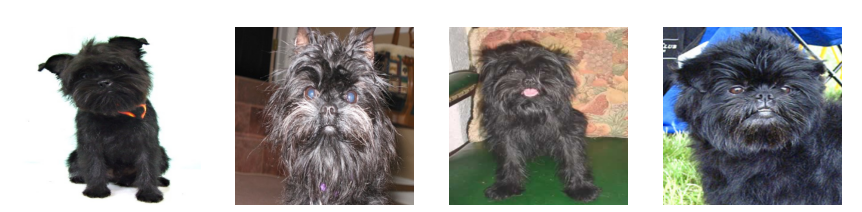

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
for i in range(4):
  ax=fig.add_subplot(1,len(x),i+1) 
  ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
  plt.title("Predicted: {}".format(type_label[np.argmax(y_model[i])]), fontdict={'fontsize': 17, 'color': 'white'})
  plt.axis('off')
plt.show()
